#Activation / Loss / Optimizer

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

##Activations

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
def plotting(title, in_data, out_data):
    plt.plot(np.sort(in_data), np.sort(out_data))
    plt.xlabel('indata')
    plt.ylabel('outdata')
    plt.title(title)

-5 ~ +5 에 해당하는 데이터 1000건을 생성한다

In [0]:
data = (np.random.random((1000)).astype('float32')-.5)*10        

In [0]:
data[:10]

array([-0.39601356, -4.618235  ,  4.2335596 , -3.8432856 ,  3.9996707 ,
        4.887706  , -3.792435  ,  3.0869484 ,  2.753251  ,  4.432641  ],
      dtype=float32)

### Activation들의 형태 확인하기

위에서 생성한 data를 넣었을 때 activation function들의 결과를 확인하자

#### Linear

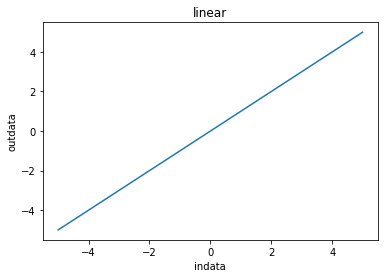

In [0]:
plotting('linear', data, tf.keras.activations.linear(data))

#### Sigmoid

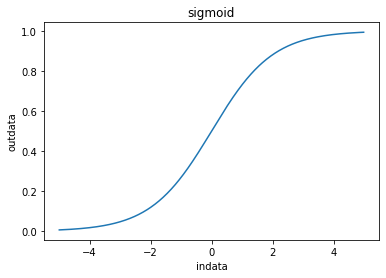

In [0]:
plotting('sigmoid', data, tf.keras.activations.sigmoid(data))

#### ReLU

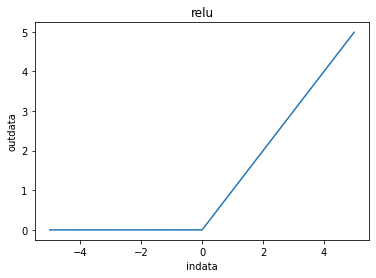

In [0]:
plotting('relu', data, tf.keras.activations.relu(data))

#### Tanh


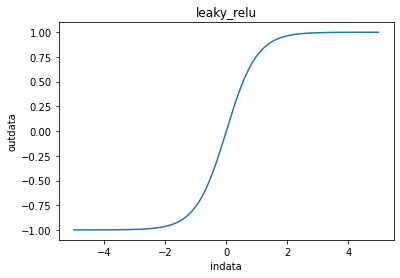

In [0]:
plotting('leaky_relu', data, tf.keras.activations.tanh(data))

## Optimizer

# MNIST data에 activation function 바꿔 적용해보기

[tf.keras.activations docs](https://www.tensorflow.org/api_docs/python/tf/keras/activations)

[tf.keras.losses docs](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

[tf.keras.optimizer docs](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

MNIST 데이터 로드


In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

# validation set 별도 구분
x_train, x_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]


TF Sequential 활용하여 모델 간편하게 구현하기

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(50, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=1.0) 
# model.compile(optimizer=sgd_optimizer, loss='mean_squared_error',metrics=['accuracy'])  
model.compile(optimizer='sgd',loss='mean_squared_error',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)
result = model.evaluate(x_test,  y_test, verbose=2)

# 실습 MISSION #5
위에서 작성했던 코드를 조건에 맞게 변경해보자!

* model을 model_5로 변경
* activation을 relu로 변경
* loss를 cross-entropy로 변경
* optimizer를 adam으로 변경

In [0]:
# MISSION을 작성하세요




# 실습 MISSION #6
다양한 optimizer를 테스트하고 수렴 속도를 확인하자

MISSION #5에서 작성했던 모델을 활용, 
네 개의 서로다른 모델을 만들어 아래 네 optimizer를 각각 적용하고 빌드하여 history를 다른이름으로 저장한 뒤 그래프로 나타내시오

* SGD
* SGD with learning rate 0.1, momentum 0.1
* RMSProp
* Adam


In [0]:
def plot_history(histories):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    plt.plot(history.epoch, history.history['val_loss'], label=name.title())
    # plt.plot(history.epoch, history.history['val_accuracy'], label=name.title())


  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.xlim([0,max(history.epoch)])

In [0]:
# MISSION을 작성하세요
 

In [0]:
plot_history([('SGD', history_sgd),
              ('SGD w/momentum', history_sgdm),
              ('RMSProp', history_rmsprop),
              ('Adam', history_adam)])